**Dataset Description:**

The Car Price Dataset contains 10,000 records with 10 attributes detailing used cars and their resale prices. It includes brand, model, year (2000–2023), engine size (1.0L–5.0L), fuel type, transmission, mileage, doors, owner count, and price ($2,000–$18,301). Newer cars, luxury brands, and lower mileage vehicles generally have higher prices. Automatic, diesel, and hybrid cars also tend to be more valuable. The dataset is ideal for price prediction models and market analysis, revealing trends such as depreciation patterns and the rising popularity of hybrid and electric vehicles due to environmental concerns.

**Columns in dataset:** 

* Brand (object): The car manufacturer (e.g., Kia, Chevrolet, Mercedes, Audi, etc.).
* Model (object): The specific model of the car.
* Year (int64): The manufacturing year of the car (range: 2000 to 2023).
* Engine_Size (float64): The size of the engine in liters (range: 1.0L to 5.0L).
* Fuel_Type (object): The type of fuel used (e.g., Diesel, Hybrid, Electric).
* Transmission (object): The type of transmission (e.g., Manual, Automatic, Semi-Automatic).
* Mileage (int64): The total distance the car has traveled, in kilometers (range: 25 to 299,947).
* Doors (int64): The number of doors (range: 2 to 5).
* Owner_Count (int64): The number of previous owners (range: 1 to 5).
* Price (int64): The selling price of the car in USD (range: $2,000 to $18,301)

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("car_price_dataset.csv")

In [4]:
df

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


In [5]:
df.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

In [8]:
brand=pd.get_dummies(df['Brand'],prefix="Brand")

In [9]:
model=pd.get_dummies(df['Model'],prefix="Model")

In [10]:
fuel_type=pd.get_dummies(df['Fuel_Type'],prefix="Fuel_Type")

In [11]:
transmission=pd.get_dummies(df['Transmission'],prefix="Transmission")

In [12]:
print(brand)

      Brand_Audi  Brand_BMW  Brand_Chevrolet  Brand_Ford  Brand_Honda  \
0          False      False            False       False        False   
1          False      False             True       False        False   
2          False      False            False       False        False   
3           True      False            False       False        False   
4          False      False            False       False        False   
...          ...        ...              ...         ...          ...   
9995       False      False            False       False        False   
9996       False      False             True       False        False   
9997       False       True            False       False        False   
9998       False      False            False        True        False   
9999       False      False            False       False        False   

      Brand_Hyundai  Brand_Kia  Brand_Mercedes  Brand_Toyota  Brand_Volkswagen  
0             False       True           F

In [13]:
print(model)

      Model_3 Series  Model_5 Series  Model_A3  Model_A4  Model_Accord  \
0              False           False     False     False         False   
1              False           False     False     False         False   
2              False           False     False     False         False   
3              False           False     False     False         False   
4              False           False     False     False         False   
...              ...             ...       ...       ...           ...   
9995           False           False     False     False         False   
9996           False           False     False     False         False   
9997            True           False     False     False         False   
9998           False           False     False     False         False   
9999           False           False     False     False         False   

      Model_C-Class  Model_CR-V  Model_Camry  Model_Civic  Model_Corolla  ...  \
0             False       Fals

In [14]:
print(transmission)

      Transmission_Automatic  Transmission_Manual  Transmission_Semi-Automatic
0                      False                 True                        False
1                       True                False                        False
2                       True                False                        False
3                      False                 True                        False
4                      False                False                         True
...                      ...                  ...                          ...
9995                   False                False                         True
9996                    True                False                        False
9997                    True                False                        False
9998                    True                False                        False
9999                   False                 True                        False

[10000 rows x 3 columns]


In [15]:
print(fuel_type)

      Fuel_Type_Diesel  Fuel_Type_Electric  Fuel_Type_Hybrid  Fuel_Type_Petrol
0                 True               False             False             False
1                False               False              True             False
2                 True               False             False             False
3                False                True             False             False
4                False               False              True             False
...                ...                 ...               ...               ...
9995              True               False             False             False
9996             False                True             False             False
9997             False               False             False              True
9998             False               False              True             False
9999              True               False             False             False

[10000 rows x 4 columns]


In [16]:
df.drop(["Brand","Model","Fuel_Type","Transmission"],axis=1,inplace=True)

In [17]:
df=pd.concat([df,brand,model,fuel_type,transmission],axis=1)

In [71]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('Price',axis='columns'),df.Price)

LinearRegression()

In [69]:
print(-20853476.676488727)

-20853476.676488727


In [19]:
reg.coef_

array([ 2.98601356e+02,  9.92739310e+02, -1.98903226e-02, -5.50438972e-01,
        3.58753236e-02, -2.24436812e+08, -1.87160364e+08, -1.07348510e+08,
       -2.03606973e+08, -2.54010494e+08, -1.78229664e+08, -2.39916985e+08,
       -1.54019625e+08, -2.99963967e+08, -6.33145864e+08, -3.00940984e+07,
       -3.00941054e+07,  7.18234806e+06,  7.18234374e+06,  3.67560349e+07,
       -6.32348356e+07,  3.67560346e+07,  8.27094990e+07,  3.67560420e+07,
        8.27095020e+07, -6.32348384e+07, -3.90248018e+07, -1.09905957e+08,
       -1.36474888e+07, -1.36474911e+07, -1.36474879e+07, -6.32348287e+07,
        4.15891399e+08, -1.09905952e+08, -1.09905954e+08,  2.26625281e+07,
        4.15891400e+08,  7.18234596e+06,  8.27095099e+07,  2.26625281e+07,
       -3.90248006e+07,  2.26625287e+07,  4.15891399e+08, -3.90247979e+07,
       -3.00940931e+07, -1.91707757e+08, -1.91705769e+08, -1.91706767e+08,
       -1.91707756e+08, -6.17337118e+07, -6.17352020e+07, -6.17352038e+07])

In [20]:
reg.intercept_

470104357.03766507

In [21]:
df

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Ford,...,Model_Tiguan,Model_Tucson,Model_X5,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Hybrid,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Transmission_Semi-Automatic
0,2020,4.2,289944,3,5,8501,False,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,2012,2.0,5356,2,3,12092,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
2,2020,4.2,231440,4,2,11171,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,2023,2.0,160971,2,1,11780,True,False,False,False,...,False,False,False,False,True,False,False,False,True,False
4,2003,2.6,286618,3,3,2867,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2004,3.7,5794,2,4,8884,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
9996,2002,1.4,168000,2,1,6240,False,False,True,False,...,False,False,False,False,True,False,False,True,False,False
9997,2010,3.0,86664,5,1,9866,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
9998,2002,1.4,225772,4,1,4084,False,False,False,True,...,False,False,False,False,False,True,False,True,False,False


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 1.0, 'Distribution of Car Prices')

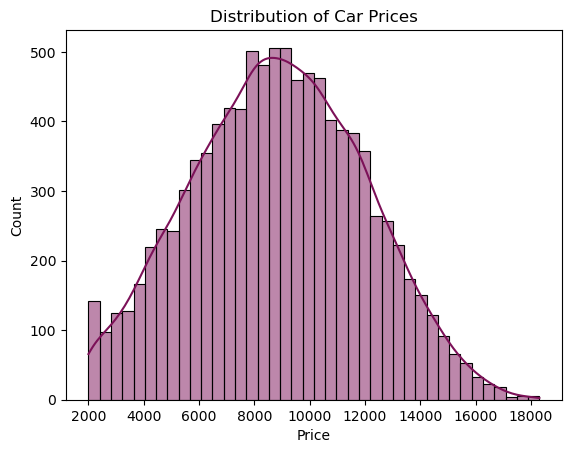

In [81]:
sns.histplot(df['Price'], kde=True, color="#7c1158")
plt.title('Distribution of Car Prices')

Text(0.5, 1.0, 'Engine Size vs. Price')

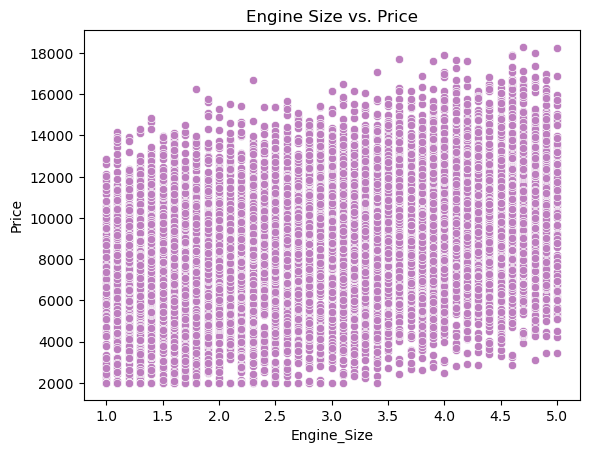

In [91]:
sns.scatterplot(x='Engine_Size', y='Price', data=df, color='#bd7ebe')
plt.title('Engine Size vs. Price')

Text(0.5, 1.0, 'Car Year vs. Price')

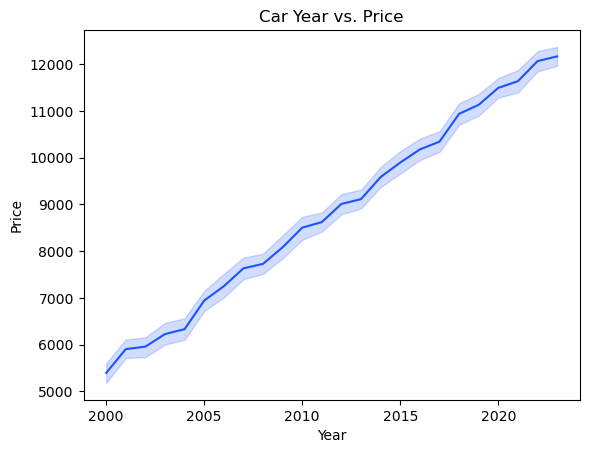

In [95]:
sns.lineplot(x='Year', y='Price', data=df, color='#1a53ff')
plt.title('Car Year vs. Price')

Text(0.5, 1.0, 'Mileage vs. Price')

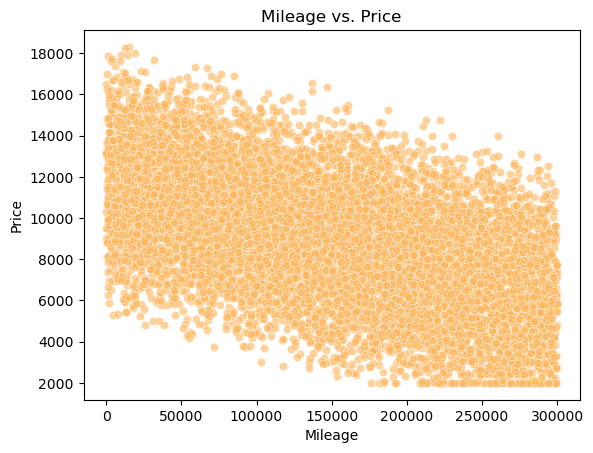

In [97]:
sns.scatterplot(x='Mileage', y='Price', data=df, color='#ffb55a', alpha=0.6)
plt.title('Mileage vs. Price')


C:\Users\varsh\AppData\Local\Temp\ipykernel_2656\1420236000.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Owner_Count', y='Price', data=df, palette='flare')


Text(0.5, 1.0, 'Owner Count vs. Price')

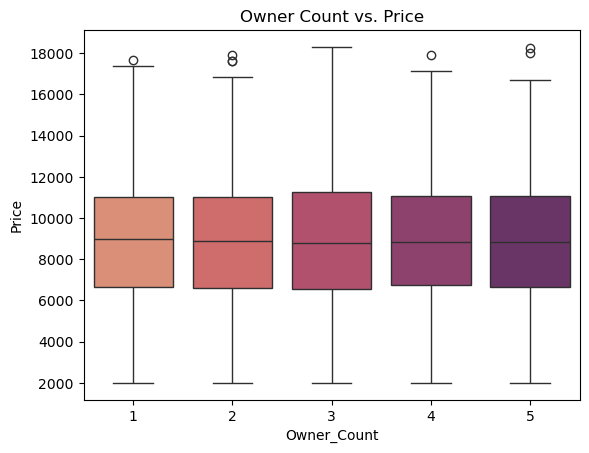

In [103]:
sns.boxplot(x='Owner_Count', y='Price', data=df, palette='flare')
plt.title('Owner Count vs. Price')

C:\Users\varsh\AppData\Local\Temp\ipykernel_2656\1862807170.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Doors', data=df, palette='Set1')


Text(0.5, 1.0, 'Number of Doors Distribution')

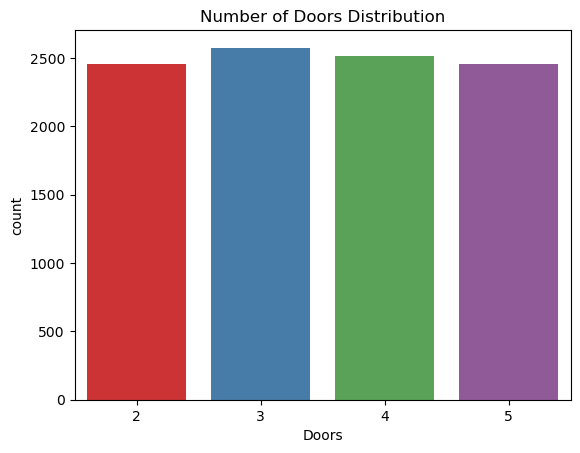

In [105]:
sns.countplot(x='Doors', data=df, palette='Set1')
plt.title('Number of Doors Distribution')

C:\Users\varsh\AppData\Local\Temp\ipykernel_2656\2518773635.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='plasma')


Text(0.5, 1.0, 'Year-wise Car Count')

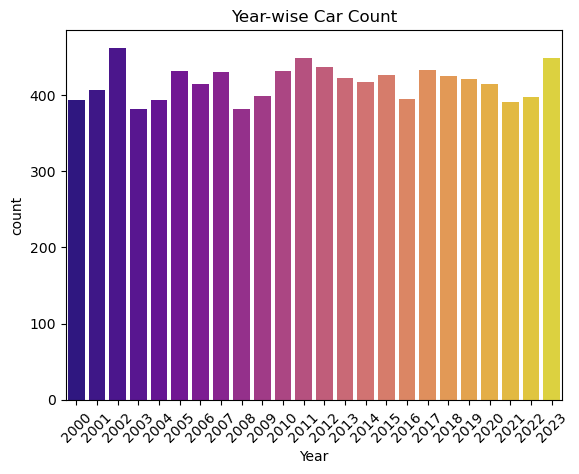

In [107]:
sns.countplot(x='Year', data=df, palette='plasma')
plt.xticks(rotation=45)
plt.title('Year-wise Car Count')

Text(0.5, 1.0, 'Correlation Heatmap')

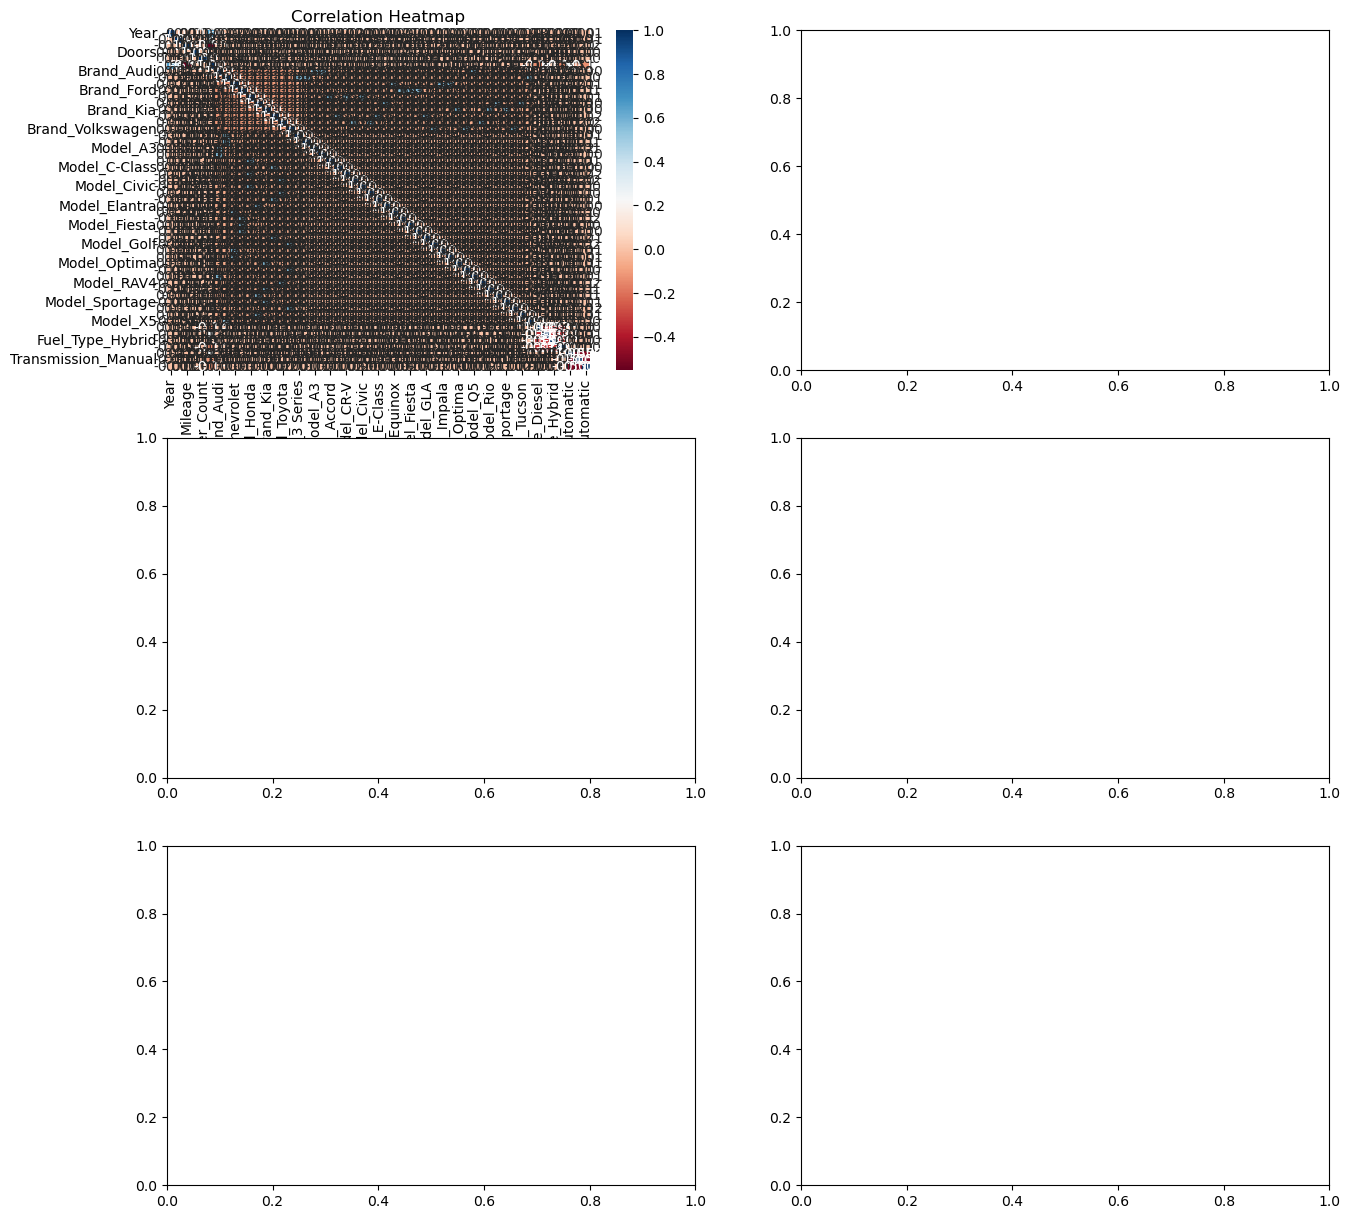

In [115]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu', ax=axes[0])
axes[0].set_title('Correlation Heatmap')

Text(0.5, 1.0, 'Distribution of Engine Sizes')

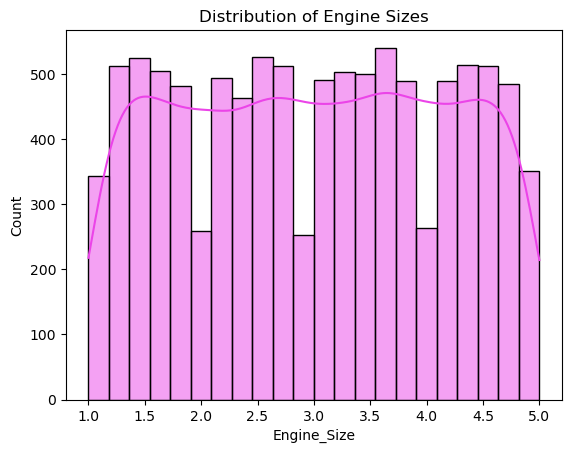

In [117]:
sns.histplot(df['Engine_Size'], kde=True, color='#eb44e8')
plt.title('Distribution of Engine Sizes')

C:\Users\varsh\AppData\Local\Temp\ipykernel_2656\3991876073.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Year', y='Price', data=df, palette='muted')


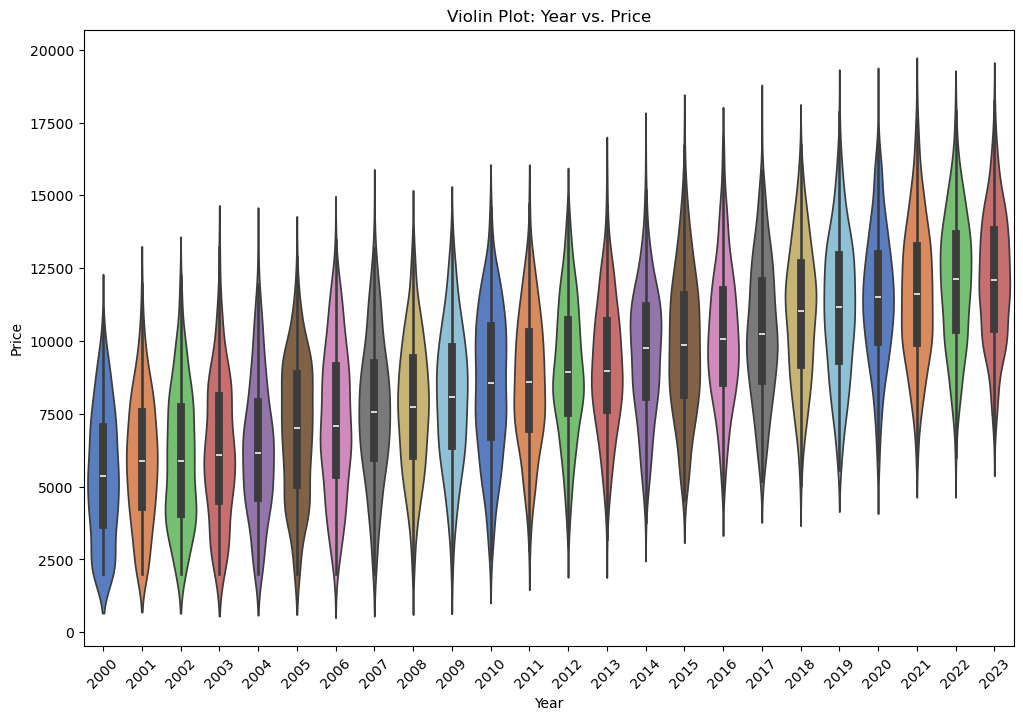

In [125]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='Year', y='Price', data=df, palette='muted')
plt.title('Violin Plot: Year vs. Price')
plt.xticks(rotation=45)
plt.show()


### **Simple Observations from the Car Price Dataset**  

1. **Car Prices Over the Years: 
   - Newer cars (especially after 2015) are much more expensive than older ones.  
   - The price of cars generally increases as they get newer.  

2. **Effect of Mileage on Price:**  
   - Cars with more mileage (more driven) are usually cheaper.  
   - Cars with less mileage keep their value better, especially newer ones.  

3. **Impact of Engine Size:**  
   - Bigger engines usually mean higher prices because they are more powerful.  
   - Cars with larger engines are often driven less, possibly because they are used for special occasions.  

4. **How the Number of Doors Affects Price:**  
   - Most cars have 4 doors, and their prices vary a lot.  
   - 2-door cars are often cheaper, possibly because they are less practical for families.  
   - 5-door cars (like hatchbacks or small SUVs) are priced in the middle.  

5. **Previous Owners and Car Prices:**  
   - Cars with fewer past owners are more expensive because they are seen as better maintained.  
   - Cars with 3 or more previous owners are usually cheaper, likely due to more wear and tear.  

6. **Fuel Type and Transmission Trends:**  
   - Hybrid and electric cars are more expensive because they are in high demand.  
   - Automatic cars usually cost more than manual ones since people prefer ease of driving.  

7. **Car Trends Over the Years:**  
   - Most cars in the dataset were made between 2015 and 2020, meaning newer models are more common.  
   - 4-door cars are the most popular choice in recent years.  

This simplified version keeps all key insights while making it easier to understand! 🚗💨